In [22]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# MNIST

## Keras

https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py

In [2]:
from tensorflow import keras
from tensorflow.keras import datasets, models, layers, optimizers
batch_size = 128
epochs = 5
imgsize = 28

### Load Data

In [26]:
(X_train, y_train), (X_test, y_test0) = datasets.mnist.load_data()
print(X_train.shape, y_train.shape)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test  = X_test.reshape(X_test.shape[0], -1)
X_train = X_train.astype('float32')/255  # normalize data from 0 to 1
X_test  = X_test.astype('float32') /255

y_train = keras.utils.to_categorical(y_train, 10) # convert class vectors to binary class matrices
y_test = keras.utils.to_categorical(y_test0, 10)

print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)
(60000, 784) (60000, 10)


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


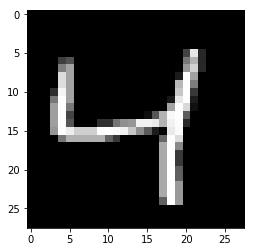

In [13]:
print(y_train[2])
plt.imshow(X_train[2].reshape(imgsize,imgsize), cmap='gray');

### Model

In [17]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],))) #can have init="glorot_normal",W_regularizer=l2(0.1)
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax')) #or: relu,sigmoid, tanh
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Train

In [18]:
model.compile(loss='categorical_crossentropy', #or 'mse',
              optimizer=optimizers.RMSprop(),  #or 'SGD(lr,momentum,nesterov=True), RMSprop(), or 'sgd'...
              metrics=['accuracy'])            #metrics to show during fit

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1,callbacks=[es],
                    validation_split=0.5) #or validation_data=(X_test, y_test)

Train on 30000 samples, validate on 30000 samples
Epoch 1/5
30000/30000 [==============================] - 2s 75us/sample - loss: 0.3407 - accuracy: 0.8955 - val_loss: 0.1628 - val_accuracy: 0.9509
Epoch 2/5
30000/30000 [==============================] - 2s 63us/sample - loss: 0.1320 - accuracy: 0.9584 - val_loss: 0.1211 - val_accuracy: 0.9628
Epoch 3/5
30000/30000 [==============================] - 2s 63us/sample - loss: 0.0868 - accuracy: 0.9726 - val_loss: 0.1133 - val_accuracy: 0.9686
Epoch 4/5
30000/30000 [==============================] - 2s 64us/sample - loss: 0.0676 - accuracy: 0.9785 - val_loss: 0.1193 - val_accuracy: 0.9681
Epoch 5/5
30000/30000 [==============================] - 2s 64us/sample - loss: 0.0530 - accuracy: 0.9834 - val_loss: 0.1221 - val_accuracy: 0.9683


In [ ]:
history.history

### Evaluate

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test0)

Test score: 0.1043436908047006
Test accuracy: 0.9709


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,959,0,3,0,0,2,2,1,1,0
1,1,1127,2,0,0,0,3,4,2,4
2,0,3,998,5,1,0,2,7,2,0
3,0,0,4,931,0,3,1,1,5,0
4,2,0,7,0,965,1,6,2,4,10
5,5,1,0,19,0,866,5,0,9,2
6,5,3,2,0,5,4,936,0,0,0
7,3,0,10,8,1,2,0,1006,4,5
8,2,1,5,2,0,3,3,0,935,2


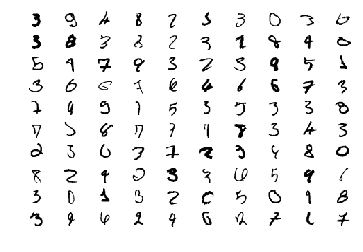

In [31]:
test_wrong = [im for im in zip(X_test,y_hat,y_test0) if im[1]!= im[2]]
for ind, val in enumerate(test_wrong[:100]):
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((imgsize, imgsize))
    plt.axis("off")
    plt.imshow(im, cmap='gray')

weight matrix transposed: (512, 784)


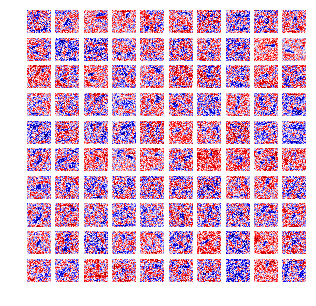

In [32]:
W1 = model.layers[0].get_weights()[0] # 0 for weights, 1 for bias
print("weight matrix transposed:",W1.T.shape)
plt.figure(figsize=(5, 5))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    im = W1.T[i].reshape((imgsize, imgsize,))
    plt.axis("off")
    plt.imshow(im, cmap='seismic')

# HRNN (https://github.com/fchollet/keras/blob/master/examples/mnist_hierarchical_rnn.py)

In [9]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM
batch_size = 32
nb_epochs = 5
row_hidden = 128
col_hidden = 128

### Data

In [16]:
X_train_ = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test_ = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
row, col, pixel = X_train_.shape[1:]

### Model

In [14]:
x = Input(shape=(row, col, pixel))
encoded_rows = TimeDistributed(LSTM(output_dim=row_hidden))(x)
encoded_columns = LSTM(col_hidden)(encoded_rows)
prediction = Dense(10, activation='softmax')(encoded_columns)
model = Model(input=x, output=prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
timedistributed_2 (TimeDistribute(None, 28, 128)       66560       input_2[0][0]                    
____________________________________________________________________________________________________
lstm_4 (LSTM)                    (None, 128)           131584      timedistributed_2[0][0]          
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 10)            1290        lstm_4[0][0]                     
Total params: 199434
______________________________________________________________________

In [ ]:
model.fit(X_train_, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,verbose=1,validation_data=(X_test_, Y_test))

scores = model.evaluate(X_test_, Y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])